In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from positionCorrection import positionCorrection as correct
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
prims = pd.read_csv('data_primaries.csv')
secos = pd.read_csv('data_secondaries.csv')

secos[0:10]

,Group Number,Subhalo ID,Mass at z=0,Max Mass,Max Mass Snap,Redshift,Rvir at z=0,Rvir at Max Mass,Pos x,Pos y,Pos z,Vel x,Vel y,Vel z,AM Stellar Mass,Escape Speed z=0,Escape Speed Max Mass
0,2430.0,624506.0,13.942057,15.423656,131.0,0.048524,134.898454,137.656698,64913.730469,72897.617188,46550.136719,70.240196,-1.176553,-212.714310,0.227367,163.515292,163.515292
1,2440.0,624891.0,21.038684,21.038684,135.0,0.000000,154.728699,154.728699,64414.042969,66188.351562,37334.441406,79.471931,-68.301575,188.076065,0.489338,202.999248,209.676720
2,2558.0,629560.0,24.288421,24.715602,134.0,0.009522,162.317164,162.826347,10421.964844,71323.492188,7523.081543,177.162109,151.676804,-5.727583,0.644677,166.043790,166.043790
3,2696.0,634749.0,12.284474,21.573414,132.0,0.033724,129.325313,154.570095,38066.519531,33855.480469,1952.893677,-59.210819,-52.816223,-231.186432,0.468627,179.877735,179.877735
4,2724.0,635740.0,28.676808,28.676808,135.0,0.000000,171.556938,171.556938,33988.386719,59353.902344,44731.007812,-98.837021,236.054871,32.974998,0.855825,217.491010,219.057562
5,2803.0,638448.0,16.229886,24.687775,112.0,0.328830,141.906788,150.981914,8595.202148,894.001465,39024.324219,-89.301567,187.051041,-83.222046,0.337542,148.016834,149.262459
6,2853.0,640217.0,9.095655,10.080128,133.0,0.023974,116.997344,120.265571,19210.091797,21410.617188,46904.957031,-63.809284,151.038925,6.649425,0.096169,267.065711,267.065711
7,2881.0,641151.0,18.353759,29.983924,100.0,0.575980,147.844903,155.014615,10559.490234,31355.458984,70541.867188,17.066425,228.767639,111.531136,0.364152,244.133721,252.612435
8,2938.0,643040.0,9.839462,12.896666,134.0,0.009522,120.103355,131.087144,57838.101562,62079.148438,50381.531250,263.703766,-30.609827,-110.041328,0.173119,184.458260,191.376324
9,3004.0,645221.0,7.784780,23.897342,117.0,0.243540,111.082794,151.931041,8055.973633,18282.712891,63698.984375,442.592865,156.507889,103.136993,0.363578,211.363264,215.834473


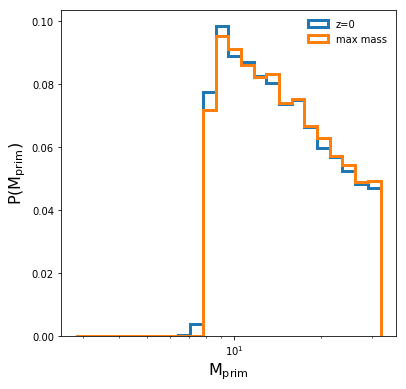

In [3]:
##################################################################
# Plotting the mass ratios between the primaries and secondaries #
##################################################################

parameter = prims['Mass at z=0'].values
parameter2 = prims['Max Mass'].values
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(parameter), np.max(parameter)

weights = np.ones_like(parameter)/len(parameter)
plt.hist(parameter, bins = 10**np.linspace(np.log10(min), np.log10(max), 25), weights=weights, histtype='step', label='z=0',  lw=3) 
plt.hist(parameter2, bins = 10**np.linspace(np.log10(min), np.log10(max), 25), weights=weights, histtype='step', label='max mass',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm M_{prim}$', fontsize=16)
plt.ylabel(r'P($\rm M_{prim}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()

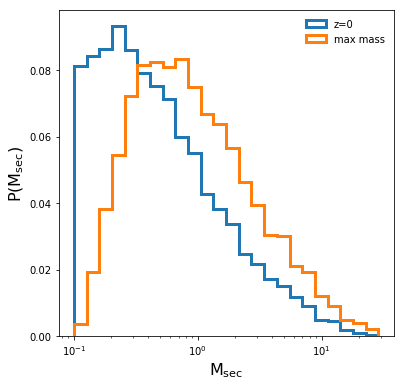

In [4]:
##################################################################
# Plotting the mass ratios between the primaries and secondaries #
##################################################################

parameter = secos['Mass at z=0'].values
parameter2 = secos['Max Mass'].values
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(parameter), np.max(parameter)

weights = np.ones_like(parameter)/len(parameter)
plt.hist(parameter, bins = 10**np.linspace(np.log10(min), np.log10(max), 25), weights=weights, histtype='step', label='z=0',  lw=3) 
plt.hist(parameter2, bins = 10**np.linspace(np.log10(min), np.log10(max), 25), weights=weights, histtype='step', label='max mass',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm M_{sec}$', fontsize=16)
plt.ylabel(r'P($\rm M_{sec}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()

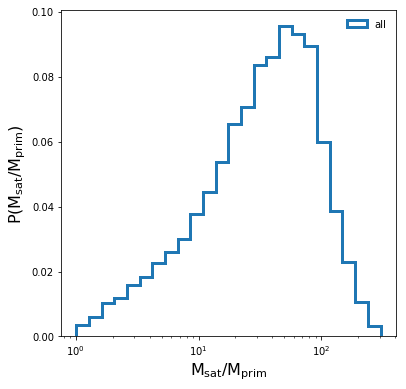

In [5]:
##################################################################
# Plotting the mass ratios between the primaries and secondaries #
##################################################################
massRatios = (prims['Mass at z=0']/secos['Mass at z=0']).values

parameter = massRatios
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(parameter), np.max(parameter)

weights = np.ones_like(parameter)/len(parameter)
plt.hist(parameter, bins = 10**np.linspace(np.log10(min), np.log10(max), 25), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm M_{sat}/M_{prim}$', fontsize=16)
plt.ylabel(r'P($\rm M_{sat}/M_{prim}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()


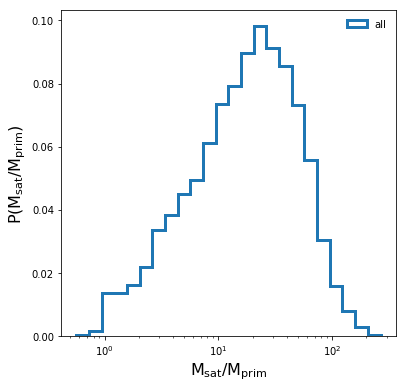

In [6]:
##################################################################
# Plotting the mass ratios between the primaries and secondaries #
##################################################################
massRatios = (prims['Max Mass']/secos['Max Mass']).values

parameter = massRatios
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(parameter), np.max(parameter)

weights = np.ones_like(parameter)/len(parameter)
plt.hist(parameter, bins = 10**np.linspace(np.log10(min), np.log10(max), 25), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm M_{sat}/M_{prim}$', fontsize=16)
plt.ylabel(r'P($\rm M_{sat}/M_{prim}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()

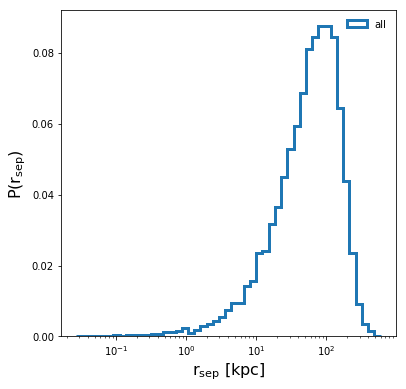

In [7]:
############################################################################
# Plotting the corrected separations between the primaries and secondaries #
############################################################################
primaryPos = np.column_stack([prims['Pos x'],prims['Pos x'],prims['Pos x']])
secondaryPos = np.column_stack([secos['Pos x'],secos['Pos x'],secos['Pos x']])
correctedSeparations = np.array([np.linalg.norm(i) for i in np.array(correct(primaryPos,secondaryPos))])


parameter = correctedSeparations
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(parameter), np.max(parameter)

weights = np.ones_like(parameter)/len(parameter)
plt.hist(parameter, bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm r_{sep}$ [kpc]', fontsize=16)
plt.ylabel(r'P($\rm r_{sep}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()


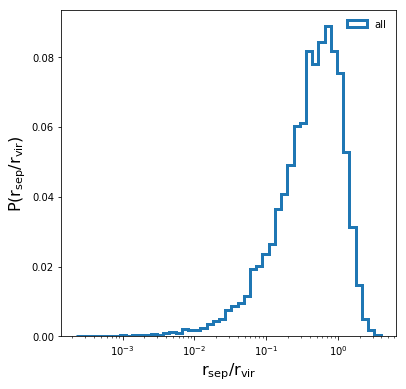

In [8]:
############################################################################
# Plotting the corrected separations between the primaries and secondaries #
############################################################################
primaryPos = np.column_stack([prims['Pos x'],prims['Pos x'],prims['Pos x']])
secondaryPos = np.column_stack([secos['Pos x'],secos['Pos x'],secos['Pos x']])
correctedSeparations = np.array([np.linalg.norm(i) for i in np.array(correct(primaryPos,secondaryPos))])
scaledSeparation = correctedSeparations/prims['Rvir at Max Mass'].values

parameter = scaledSeparation
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(parameter), np.max(parameter)

weights = np.ones_like(parameter)/len(parameter)
plt.hist(parameter, bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm r_{sep}/r_{vir}$', fontsize=16)
plt.ylabel(r'P($\rm r_{sep}/r_{vir}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()


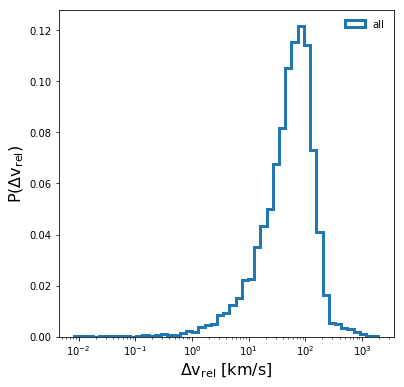

In [9]:
############################################################################
# Plotting the corrected separations between the primaries and secondaries #
############################################################################
primaryVel = np.column_stack([prims['Vel x'],prims['Vel x'],prims['Vel x']])
secondaryVel = np.column_stack([secos['Vel x'],secos['Vel x'],secos['Vel x']])
relativeVelocity = np.array([np.linalg.norm(i) for i in (primaryVel-secondaryVel)])

parameter = relativeVelocity
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(parameter), np.max(parameter)

weights = np.ones_like(parameter)/len(parameter)
plt.hist(parameter, bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm \Delta v_{rel}$ [km/s]', fontsize=16)
plt.ylabel(r'P($\rm \Delta v_{rel}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()

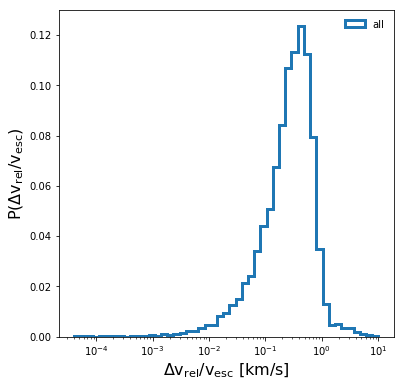

In [10]:
############################################################################
# Plotting the corrected separations between the primaries and secondaries #
############################################################################
primaryVel = np.column_stack([prims['Vel x'],prims['Vel x'],prims['Vel x']])
secondaryVel = np.column_stack([secos['Vel x'],secos['Vel x'],secos['Vel x']])
relativeVelocity = np.array([np.linalg.norm(i) for i in (primaryVel-secondaryVel)])
scaledVelocity = relativeVelocity/secos['Escape Speed z=0'].values

parameter = scaledVelocity
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(parameter), np.max(parameter)

weights = np.ones_like(parameter)/len(parameter)
plt.hist(parameter, bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm \Delta v_{rel}/v_{esc}$ [km/s]', fontsize=16)
plt.ylabel(r'P($\rm \Delta v_{rel}/v_{esc}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()

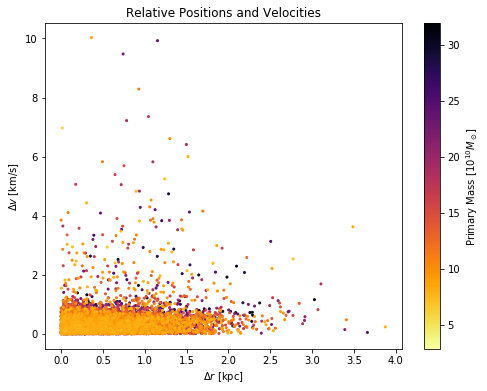

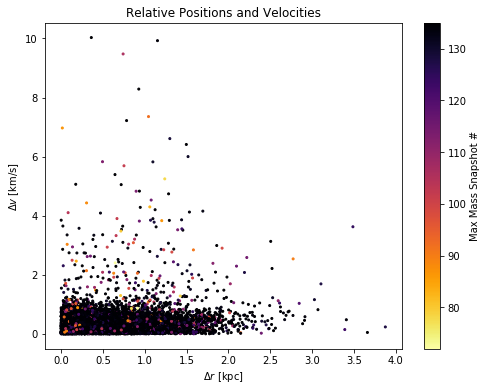

In [13]:
fig,ax = plt.subplots(figsize=(8,6))
scatterPlot = ax.scatter(scaledSeparation,scaledVelocity,c=prims['Mass at z=0'], cmap = 'inferno_r', s=4)
ax.set(xlabel=r'$\Delta r$ [kpc]', ylabel=r'$\Delta v$ [km/s]',title='Relative Positions and Velocities')
plt.colorbar(scatterPlot,label="Primary Mass $[10^{10} M_\odot$]")
plt.show()

fig,ax = plt.subplots(figsize=(8,6))
scatterPlot = ax.scatter(scaledSeparation,scaledVelocity,c=prims['Max Mass Snap'], cmap = 'inferno_r', s=4)
ax.set(xlabel=r'$\Delta r$ [kpc]', ylabel=r'$\Delta v$ [km/s]',title='Relative Positions and Velocities')
plt.colorbar(scatterPlot,label="Max Mass Snapshot #")
plt.show()


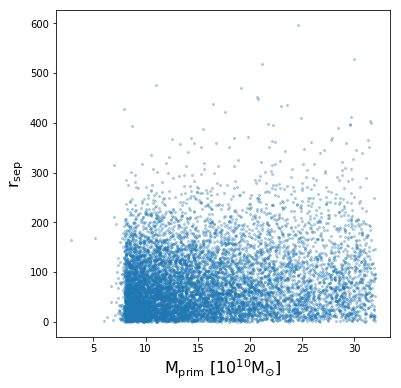

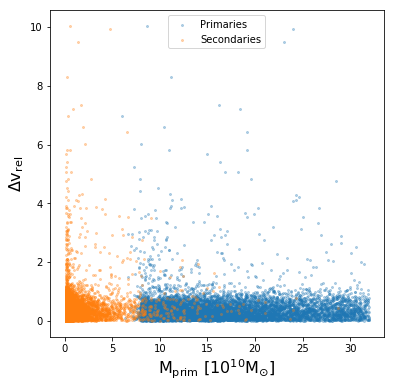

In [15]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plt.scatter(prims['Mass at z=0'],correctedSeparations,s=4,alpha=0.3)
plt.xlabel(r'$\rm M_{prim}$ [$10^{10} \rm M_{\odot}$]', fontsize=16)
plt.ylabel(r'$\rm r_{sep}$', fontsize=16)
plt.show()

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plt.scatter(prims['Mass at z=0'],scaledVelocity,s=4,alpha=0.3,label='Primaries')
plt.scatter(secos['Mass at z=0'],scaledVelocity,s=4,alpha=0.3,label='Secondaries')
plt.xlabel(r'$\rm M_{prim}$ [$10^{10} \rm M_{\odot}$]', fontsize=16)
plt.ylabel(r'$\rm \Delta v_{rel}$', fontsize=16)
plt.legend()
plt.show()

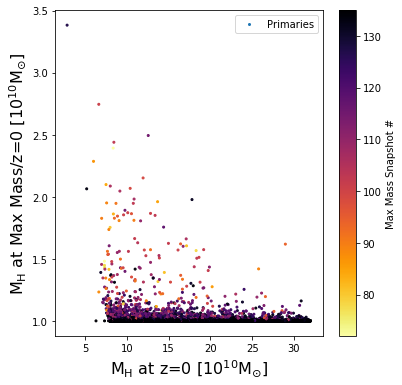

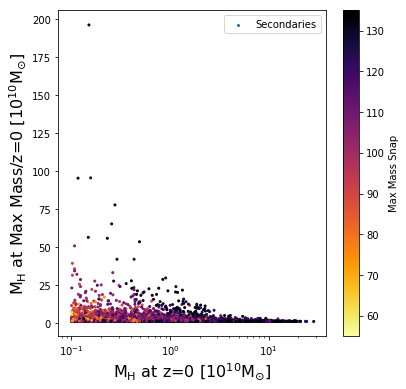

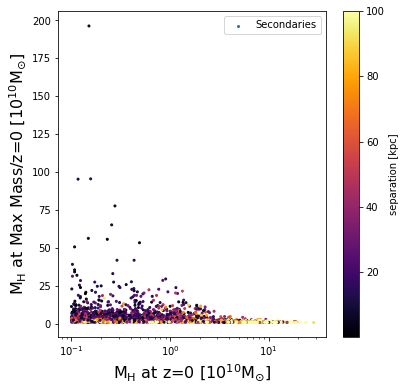

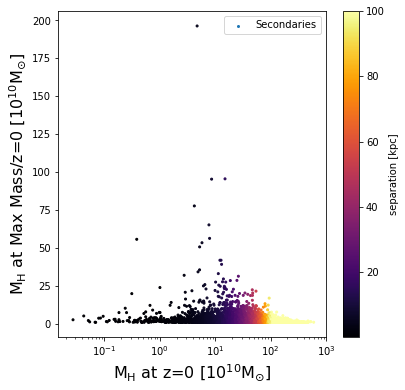

In [16]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
scatterPlot = ax.scatter(prims['Mass at z=0'],(prims['Max Mass']/prims['Mass at z=0']),c=prims['Max Mass Snap'], cmap = 'inferno_r',s=4,label='Primaries')
plt.xlabel(r'$\rm M_{H}$ at z=0 [$10^{10} \rm M_{\odot}$]', fontsize=16)
plt.ylabel(r'$\rm M_{H}$ at Max Mass/z=0 [$10^{10} \rm M_{\odot}$]', fontsize=16)
plt.colorbar(scatterPlot,label="Max Mass Snapshot #")
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
scatterPlot = ax.scatter(secos['Mass at z=0'],secos['Max Mass']/secos['Mass at z=0'],c=secos['Max Mass Snap'], cmap = 'inferno_r',s=4,label='Secondaries')
plt.xlabel(r'$\rm M_{H}$ at z=0 [$10^{10} \rm M_{\odot}$]', fontsize=16)
plt.ylabel(r'$\rm M_{H}$ at Max Mass/z=0 [$10^{10} \rm M_{\odot}$]', fontsize=16)
plt.colorbar(scatterPlot,label="Max Mass Snap")
plt.xscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
scatterPlot = ax.scatter(secos['Mass at z=0'],secos['Max Mass']/secos['Mass at z=0'],c=correctedSeparations, cmap = 'inferno',s=4,label='Secondaries',vmin = 0.0001, vmax = 100)
plt.xlabel(r'$\rm M_{H}$ at z=0 [$10^{10} \rm M_{\odot}$]', fontsize=16)
plt.ylabel(r'$\rm M_{H}$ at Max Mass/z=0 [$10^{10} \rm M_{\odot}$]', fontsize=16)
plt.colorbar(scatterPlot,label="separation [kpc]")
plt.xscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
scatterPlot = ax.scatter(correctedSeparations,secos['Max Mass']/secos['Mass at z=0'],c=correctedSeparations, cmap = 'inferno',s=4,label='Secondaries',vmin = 0.0001, vmax = 100)
plt.xlabel(r'$\rm M_{H}$ at z=0 [$10^{10} \rm M_{\odot}$]', fontsize=16)
plt.ylabel(r'$\rm M_{H}$ at Max Mass/z=0 [$10^{10} \rm M_{\odot}$]', fontsize=16)
plt.colorbar(scatterPlot,label="separation [kpc]")
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
#secos[secos['Max Mass']/secos['Mass at z=0'] > 50]

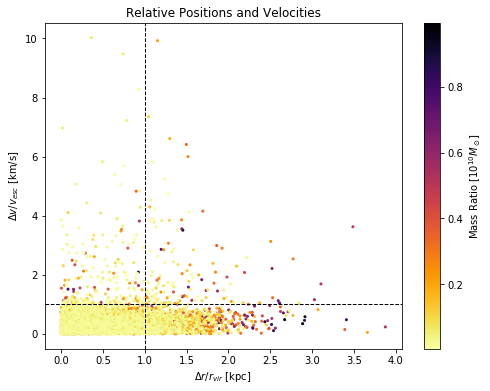

In [50]:
fig,ax = plt.subplots(figsize=(8,6))
scatterPlot = ax.scatter(scaledSeparation,scaledVelocity,c=secos['Mass at z=0']/prims['Mass at z=0'], cmap = 'inferno_r', s=4)
ax.set(xlabel=r'$\Delta r/r_{vir}$ [kpc]', ylabel=r'$\Delta v/v_{esc}$ [km/s]',title='Relative Positions and Velocities')
plt.colorbar(scatterPlot,label="Mass Ratio $[10^{10} M_\odot$]")
plt.axvline(1,color='black', linestyle='dashed',linewidth=1)
plt.axhline(1,color='black', linestyle='dashed',linewidth=1)
plt.show()

In [45]:
mask = scaledVelocity <= 1 
cutPrims = prims[mask]
cutSecos = secos[mask]
print(len(prims))
print(len(cutPrims))


9901
9548


Add percentage of halos in each box
as a funciton of redshift


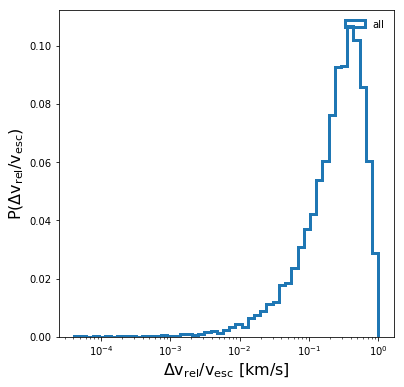

In [47]:
############################################################################
# Plotting the corrected separations between the primaries and secondaries #
############################################################################
primaryVelCut = np.column_stack([cutPrims['Vel x'],cutPrims['Vel x'],cutPrims['Vel x']])
secondaryVelCut = np.column_stack([cutSecos['Vel x'],cutSecos['Vel x'],cutSecos['Vel x']])
relativeVelocityCut = np.array([np.linalg.norm(i) for i in (primaryVelCut-secondaryVelCut)])
scaledVelocityCut = relativeVelocityCut/cutSecos['Escape Speed z=0'].values

parameter = scaledVelocityCut
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(parameter), np.max(parameter)

weights = np.ones_like(parameter)/len(parameter)
plt.hist(parameter, bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm \Delta v_{rel}/v_{esc}$ [km/s]', fontsize=16)
plt.ylabel(r'P($\rm \Delta v_{rel}/v_{esc}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()


___

In [ ]:
#testing/debugging

#         primaryID      = subID[groupMask][locationOfPrimary].values[0]
#         primaryMass    = mass[groupMask][locationOfPrimary].values[0]
#         primaryMaxMass = maxMass[groupMask][locationOfPrimary].values[0]
#         primaryPos     = position[groupMask][locationOfPrimary][0]
#         primaryPosX     = position[groupMask][locationOfPrimary][0][0]
#         primaryPosY     = position[groupMask][locationOfPrimary][0][1]
#         primaryPosZ     = position[groupMask][locationOfPrimary][0][2]

#         primaries.append([primaryID, primaryMass, primaryMaxMass, primaryPos, primaryPosX, primaryPosY, primaryPosZ])

#         secondaryID      = subID[groupMask][locationOfSecondary].values[0]
#         secondaryMass    = mass[groupMask][locationOfSecondary].values[0]
#         secondaryMaxMass = maxMass[groupMask][locationOfSecondary].values[0]
#         secondaryPos     = position[groupMask][locationOfSecondary][0]
#         secondaryPosX     = position[groupMask][locationOfSecondary][0][0]
#         secondaryPosY     = position[groupMask][locationOfSecondary][0][1]
#         secondaryPosZ     = position[groupMask][locationOfSecondary][0][2]
#         secondaryVel      = velocity[groupMask][locationOfSecondary][0]
#         secondaryVelX     = velocity[groupMask][locationOfSecondary][0][0]
#         secondaryVelY     = velocity[groupMask][locationOfSecondary][0][1]
#         secondaryVelZ     = velocity[groupMask][locationOfSecondary][0][2]

#         secondaries.append([secondaryID, secondaryMass, secondaryMaxMass, secondaryPos, secondaryPosX, secondaryPosY, secondaryPosZ])


    
#    print(subID[groupMask][locationOfPrimary].values)
#    print(type(subID[groupMask][locationOfPrimary].values))
#    primaries.append(np.array([subID[groupMask][locationOfPrimary].values,subID[groupMask][locationOfPrimary].values]))
#   primaries.append(np.array([subID[groupMask][locationOfPrimary],subMassz0[groupMask][locationOfPrimary]]))
#    primaries.append(subID[groupMask][locationOfPrimary])
#    primaries.append(subID[groupMask][locationOfPrimary].values())
#    secondaries.append(np.array(subID[groupMask][locationOfSecondary]))
#    newMasses = masses.drop(max(masses)) # removing the largest element from temp list 
#    locationOfSecondary = max(masses) == subMassz0[groupMask]
#     topTwo = masses.nlargest(n=2)
#     locationOfPrimary = subMassz0[groupMask] == topTwo[0]
#     locationOfSecondary = subMassz0[groupMask] == topTwo[1]    
#     primID = subID[groupMask][locationOfPrimary][0]
#     mass = subMassz0[groupMask][locationOfPrimary][0]
#     maxMass = subMassMax[groupMask][locationOfPrimary][0]
#     xPos = subPos[groupMask][locationOfPrimary][0][0]
#     yPos = subPos[groupMask][locationOfPrimary][0][1]
#     zPos = subPos[groupMask][locationOfPrimary][0][2]
#     primaries.append([primID,mass])
#     #secondaries.append(np.array(subID[groupMask][locationOfSecondary]))
#     print(primaries)
#     locationOfPrimary = max(masses) == subMassz0[groupMask]
#     primaries.append(np.array(subID[groupMask][locationOfPrimary]))
#     masses.remove(max(newMasses)) # removing the largest element from temp list 
#     locationOfSecondary = max(masses) == subMassz0[groupMask]
#     secondaries.append(np.array(subID[groupMask][locationOfSecondary]))
# secondaries = []
# for i in np.unique(groups):
#     groupMask = groups == i
#     groupedMasses = subMassz0[groupMask]
#     primaryMask = subMassz0 == max(groupedMasses)
#     secondaryMask = min( max(groupedMasses) - groupedMasses ) == (max(groupedMasses) - subMassz0)
#     primaries.append(np.array([subID[primaryMask], subMassz0[primaryMask], subMassMax[primaryMask], subPos[primaryMask][0][0],subPos[primaryMask][0][1],subPos[primaryMask][0][2]]))
#     secondaries.append(np.array([subID[secondaryMask], subMassz0[secondaryMask], subMassMax[secondaryMask], subPos[secondaryMask][0][0],subPos[secondaryMask][0][1],subPos[secondaryMask][0][2]]))
